In [1]:
import os
os.environ["ONNXRUNTIME_EXECUTION_PROVIDERS"] = "[CUDAExecutionProvider]"

### Ball, Players, Goalkeepers, and Referees Detection

In [3]:
from ultralytics import YOLO

PLAYER_DETECTION_MODEL = YOLO('../models/detection_model/weights/best_detection.pt')


##### Single Frame Detection

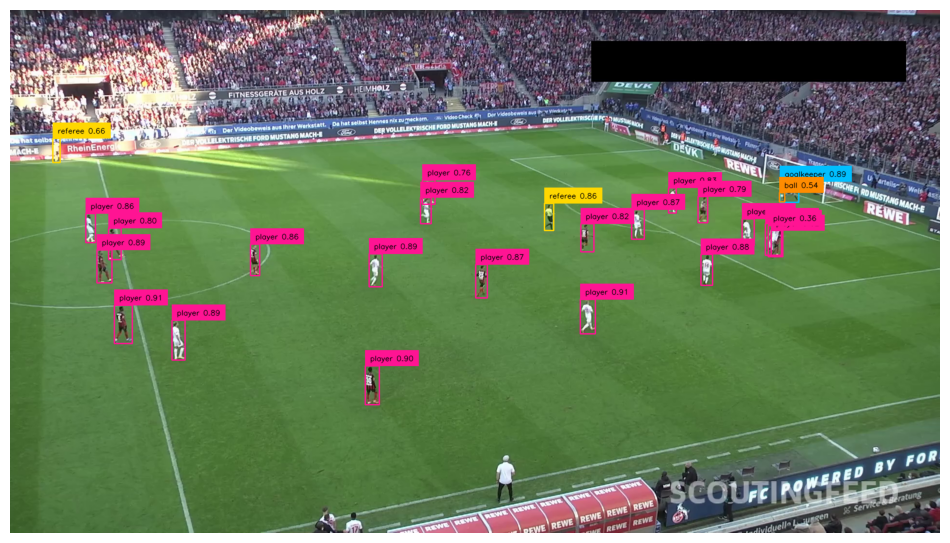

In [18]:
import supervision as sv

box_annotator = sv.BoxAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex("#000000")
)

SOURCE_VIDEO_PATH = "../content/573e61_0.mp4"

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator) # get a single frame; frame is HxWx3 NumPy array in BGR

# get detections for first image (theres only one image rn)
# results holds: Bounding Boxes ([x1, y1, x2, y2]), confidence scores, class ids
result = PLAYER_DETECTION_MODEL.predict(frame, conf=0.3, verbose=False)[0] 

# convert to sv.Detections object
# array of box coordinates, array of scores, array of class indices
detections = sv.Detections.from_ultralytics(result) 

labels = [
    f"{class_name} {confidence:.2f}"
    for class_name, confidence
    in zip(detections["class_name"], detections.confidence)
]

annotated_frame = frame.copy()
annotated_frame = box_annotator.annotate(annotated_frame, detections) # draws detections info on frame
annotated_frame = label_annotator.annotate(annotated_frame, detections, labels=labels)

sv.plot_image(annotated_frame)